#  Accident record analysis and severity prediction  


### ABOUT DATA SET

The Open Data Program makes the data openly available to the public for the purpose of increasing the quality of life for the residents, increasing transparency, accountability and comparability, promoting economic development and research, and improving internal performance management.

The Traffic Records Group, Traffic Management Division, Seattle Department of Transportation, provides data for all collisions and crashes that have occured in the state from 2004 to the present day. The data is updated weekly and can be found at the Seattle Open GeoData Portal.

### ABOUT THIS PROJECT


The objective is to exploit this data to extract vital features that would enable us to end up with a good model that would enable the prediction of the severity of future accidents that take place in the state. This would further enable the Department of Transportation to prioritise their SOPs and channel their energy to ensure that fewer fatalities result in automobile collisions.

IN SIMPLE WORDS: from previous the data where we have a records of all  accidents and severity caused in seattle city we will try to predict the severity of an accident that may happen in future so as to reduce those .

In [1]:
#Importing python modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [17]:
print('hello capstone project course!')

hello capstone project course!


below code downloads previous years accidents data from seattle website in csv format

In [18]:
#!wget -O data.csv "https://opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv"

pandas dataframe reads the csv file in the folder 

In [19]:
df = pd.read_csv("data.csv")

viewimg first 5 entries of our of data

In [20]:
df.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.356511,47.517361,1,327920,329420,3856094,Matched,Intersection,34911.0,17TH AVE SW AND SW ROXBURY ST,...,Dry,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,-122.361405,47.702064,2,46200,46200,1791736,Matched,Block,NaN,HOLMAN RD NW BETWEEN 4TH AVE NW AND 3RD AVE NW,...,Wet,Dusk,NaN,5101020.0,NaN,13,From same direction - both going straight - bo...,0,0,N
2,-122.317414,47.664028,3,1212,1212,3507861,Matched,Block,NaN,ROOSEVELT WAY NE BETWEEN NE 47TH ST AND NE 50T...,...,Dry,Dark - Street Lights On,NaN,NaN,NaN,30,From opposite direction - all others,0,0,N
3,-122.318234,47.619927,4,327909,329409,EA03026,Matched,Intersection,29054.0,11TH AVE E AND E JOHN ST,...,Wet,Dark - Street Lights On,NaN,NaN,NaN,0,Vehicle going straight hits pedestrian,0,0,N
4,-122.351724,47.560306,5,104900,104900,2671936,Matched,Block,NaN,WEST MARGINAL WAY SW BETWEEN SW ALASKA ST AND ...,...,Ice,Dark - Street Lights On,NaN,9359012.0,Y,50,Fixed object,0,0,N


here is the description of some of the attributes in the data

| ATTRIBUTE | DESCRIPTION |
| --- | --- |
| X | Latitude where accident took place |
| Y | longitude where accident took place |
| SEVERITYCODE | A code that corresponds to the severity of the collision:• 3—fatality• 2b—serious injury• 2—injury• 1—prop damage• 0 unknown |
| SEVERITYDESC | A detailed description of the severity of the collision |
| PERSONCOUNT | The total number of people involved in the collision |
| PEDCOUNT | The number of pedestrians involved in the collision. This is entered by the state. |
| PEDCYLCOUNT | The number of bicycles involved in the collision.This is entered by the state. |
| VEHCOUNT | The number of vehicles involved in the collision.This is entered by the state. |
| INJURIES | The number of total injuries in the collision. |
| SERIOUSINJURIES | The number of serious injuries in the collision. |
| FATALITIES | The number of fatalities in the collision. |
| UNDERINFL | Whether or not a driver involved was under the nfluence of drugs or alcohol. |
| WEATHER | A description of the weather conditions during the time of the collision. |
| ROADCOND | The condition of the road during the collision. |
| LIGHTCOND | The light conditions during the collision. |
| SPEEDING | Whether or not speeding was a factor in the collision. |


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221738 entries, 0 to 221737
Data columns (total 40 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   X                214260 non-null  float64
 1   Y                214260 non-null  float64
 2   OBJECTID         221738 non-null  int64  
 3   INCKEY           221738 non-null  int64  
 4   COLDETKEY        221738 non-null  int64  
 5   REPORTNO         221738 non-null  object 
 6   STATUS           221738 non-null  object 
 7   ADDRTYPE         218024 non-null  object 
 8   INTKEY           72027 non-null   float64
 9   LOCATION         217145 non-null  object 
 10  EXCEPTRSNCODE    101335 non-null  object 
 11  EXCEPTRSNDESC    11785 non-null   object 
 12  SEVERITYCODE     221737 non-null  object 
 13  SEVERITYDESC     221738 non-null  object 
 14  COLLISIONTYPE    195287 non-null  object 
 15  PERSONCOUNT      221738 non-null  int64  
 16  PEDCOUNT         221738 non-null  int6

In [22]:
#copying the features needed for the prediction

sorted_df = df[['X', 'Y','WEATHER','ROADCOND','LIGHTCOND','SPEEDING','SEVERITYCODE', 'UNDERINFL','SERIOUSINJURIES','FATALITIES','INJURIES','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT']]


## DATA CLEANING

In [23]:
#maping the unknown and other as empty values

sorted_df.replace('Unknown', np.nan, inplace=True)
sorted_df.replace('Other', np.nan, inplace=True)
sorted_df['SEVERITYCODE'].replace('0', np.nan, inplace=True)

In [24]:
sorted_df['SEVERITYCODE'] = sorted_df['SEVERITYCODE'].map({'1':1,'2':2,'3':4,'2b':3 })
sorted_df.SEVERITYCODE.value_counts()

1.0    137776
2.0     58842
3.0      3111
4.0       352
Name: SEVERITYCODE, dtype: int64

In [25]:
sorted_df['SPEEDING'] = sorted_df['SPEEDING'].map({'Y': 1})
sorted_df['SPEEDING'].replace(np.nan, 0, inplace=True)
sorted_df['SPEEDING'].value_counts().to_frame()

,SPEEDING
0.0,211802
1.0,9936


In [26]:
sorted_df['UNDERINFL'] = sorted_df['UNDERINFL'].map({'N': 0, '0': 0, 'Y': 1, '1': 1})
sorted_df['UNDERINFL'].value_counts().to_frame()


,UNDERINFL
0.0,185678
1.0,9629


In [27]:
#Dropping values with null
sorted_df.dropna(axis = 0,inplace = True)

In [28]:
sorted_df.describe().T

,count,mean,std,min,25%,50%,75%,max
X,171504.0,-122.330380,0.029842,-122.419032,-122.348226,-122.330307,-122.311952,-122.238949
Y,171504.0,47.618885,0.056785,47.495573,47.573910,47.614776,47.663667,47.734142
SPEEDING,171504.0,0.052879,0.223793,0.000000,0.000000,0.000000,0.000000,1.000000
SEVERITYCODE,171504.0,1.363134,0.526181,1.000000,1.000000,1.000000,2.000000,4.000000
UNDERINFL,171504.0,0.053812,0.225647,0.000000,0.000000,0.000000,0.000000,1.000000
SERIOUSINJURIES,171504.0,0.018833,0.177002,0.000000,0.000000,0.000000,0.000000,41.000000
FATALITIES,171504.0,0.002029,0.049209,0.000000,0.000000,0.000000,0.000000,5.000000
INJURIES,171504.0,0.457021,0.788220,0.000000,0.000000,0.000000,1.000000,78.000000
PERSONCOUNT,171504.0,2.513317,1.427652,0.000000,2.000000,2.000000,3.000000,93.000000
PEDCOUNT,171504.0,0.046903,0.223131,0.000000,0.000000,0.000000,0.000000,6.000000


## WEATHER

Table below shows count of "weather prevailing during accident"

In [29]:
sorted_df['WEATHER'].value_counts().to_frame()

,WEATHER
Clear,110319
Raining,32433
Overcast,27196
Snowing,825
Fog/Smog/Smoke,545
Sleet/Hail/Freezing Rain,109
Blowing Sand/Dirt,42
Severe Crosswind,25
Partly Cloudy,10


Text(0.5, 1.0, 'WEATHER condition in collision')

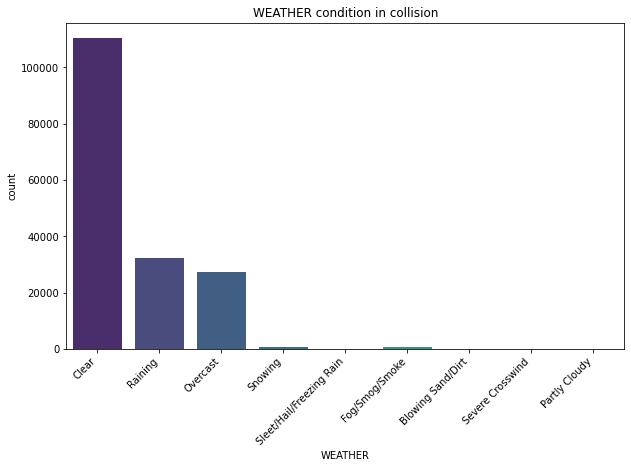

In [30]:
#converting data to plots

plt.figure(figsize =(10,6))
ax = sns.countplot(x= 'WEATHER',data = sorted_df,orient = 'h',palette = 'viridis')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,horizontalalignment='right')
plt.title('WEATHER condition in collision')


## ROAD CONDITION

In [31]:
sorted_df['ROADCOND'].value_counts().to_frame()

,ROADCOND
Dry,123192
Wet,46200
Ice,1077
Snow/Slush,830
Standing Water,98
Sand/Mud/Dirt,58
Oil,49


Text(0.5, 1.0, 'road condition in collison')

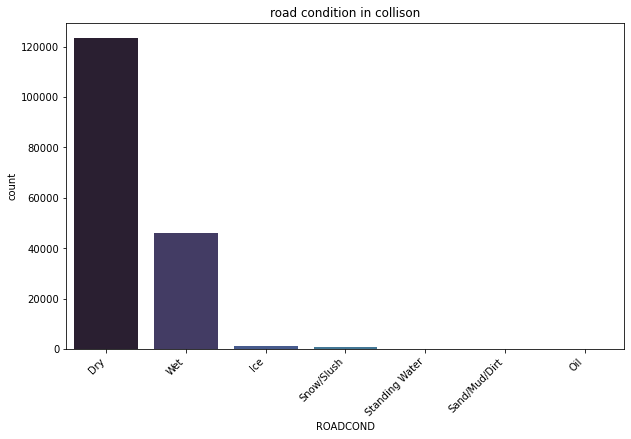

In [32]:
plt.figure(figsize =(10,6))
ax = sns.countplot(x= 'ROADCOND',data = sorted_df,orient = 'h',palette = 'mako')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,horizontalalignment='right')
plt.title('road condition in collison')

## SPEEDING AS CAUSE OF ACCIDENT

1 = Overspeeding
0 = Not speeding

In [75]:
sorted_df['SPEEDING'].value_counts().to_frame()

,SPEEDING
0.0,162435
1.0,9069


Text(0.5, 1.0, 'accidents caused due to speeding')

<Figure size 720x432 with 0 Axes>

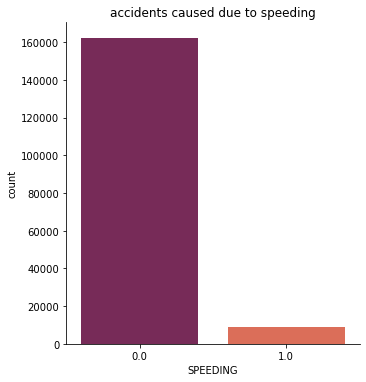

In [33]:
plt.figure(figsize =(10,6))
sns.catplot(x='SPEEDING',kind="count",data = sorted_df,palette = 'rocket')
plt.title('accidents caused due to speeding')

## LIGHT CONDITION DURING ACCIDENT

Table shows number of diffent light condition when accident took place

In [34]:
sorted_df['LIGHTCOND'].value_counts().to_frame()

,LIGHTCOND
Daylight,113656
Dark - Street Lights On,47198
Dusk,5707
Dawn,2439
Dark - No Street Lights,1376
Dark - Street Lights Off,1110
Dark - Unknown Lighting,18


Text(0.5, 1.0, 'light condition in collision')

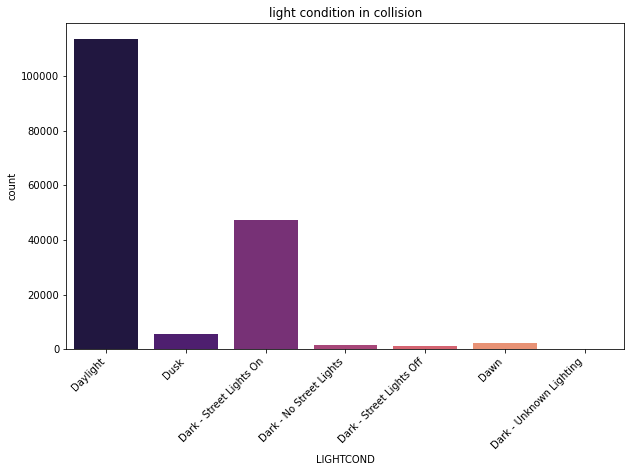

In [35]:
plt.figure(figsize =(10,6))
ax = sns.countplot(x= 'LIGHTCOND',data = sorted_df,orient = 'h',palette = 'magma')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,horizontalalignment='right')
plt.title('light condition in collision')

## SEVERITY CODE 

table below shows count of diffrent severity cases in our data set
please note severity code description here



| SEVERITYCODE | Meaning |
| --- | --- |
| 1 | Accidents resulting in property damage |
| 2 | Accidents resulting in injuries |
| 3 | Accidents resulting in serious injuries |
| 4 | Accidents resulting in fatalities |


In [36]:
sorted_df['SEVERITYCODE'].value_counts().to_frame()

,SEVERITYCODE
1.0,112810
2.0,55434
3.0,2935
4.0,325


Text(0.5, 1.0, 'distribution of severity code')

<Figure size 720x432 with 0 Axes>

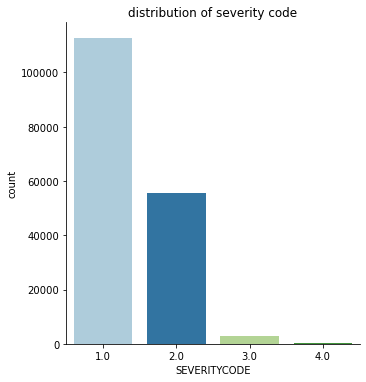

In [37]:
plt.figure(figsize =(10,6))
sns.catplot(x='SEVERITYCODE',kind="count",data = sorted_df,palette = 'Paired')
plt.title('distribution of severity code')


## SERIOUS INJURIES

below table shows the count of serious injuries per accident where 0 means there were 0 serious injuries in the accident and corresponding number that is 218624 means there were 2,18,624 accidents recorded zero serious injuries

In [38]:
sorted_df['SERIOUSINJURIES'].value_counts().to_frame()

,SERIOUSINJURIES
0,168525
1,2817
2,127
3,23
4,6
5,5
41,1


Text(0.5, 1.0, 'accidents that resulted serious injuries')

<Figure size 720x432 with 0 Axes>

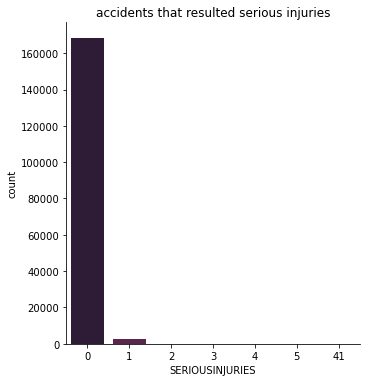

In [39]:
plt.figure(figsize =(10,6))
sns.catplot(x='SERIOUSINJURIES',kind="count",data = sorted_df,palette = 'rocket')
plt.title('accidents that resulted serious injuries')

## INJURIES

below table shows the count of 'number of persons injuried per accident'


In [40]:
sorted_df['INJURIES'].value_counts().to_frame()

,INJURIES
0,113027
1,44447
2,10187
3,2634
4,780
5,264
6,92
7,38
8,11
9,10


Text(0, 0.5, 'count of injuries in data')

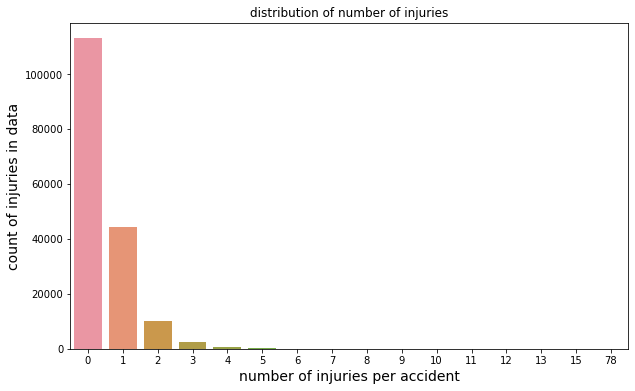

In [41]:
plt.figure(figsize = (10,6))
ax = sns.countplot(sorted_df['INJURIES'])
plt.title('distribution of number of injuries')
plt.xlabel('number of injuries per accident',size = 14)
plt.ylabel('count of injuries in data',size = 14)


## FATALITIES

count of "number of fatalities per accident"

In [42]:
sorted_df['FATALITIES'].value_counts().to_frame()

,FATALITIES
0,171179
1,309
2,12
3,2
5,1
4,1


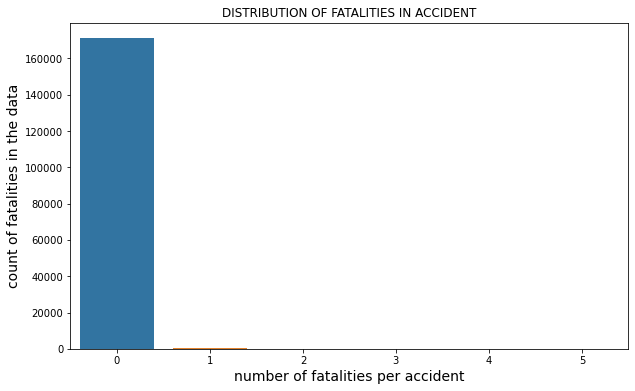

In [43]:
plt.figure(figsize = (10,6))
ax = sns.countplot(sorted_df['FATALITIES'])
plt.title('DISTRIBUTION OF FATALITIES IN ACCIDENT')
plt.xlabel('number of fatalities per accident',size = 14)
plt.ylabel('count of fatalities in the data',size = 14)
plt.show()

representating excluding the 0 and fatality count

<Figure size 720x432 with 0 Axes>

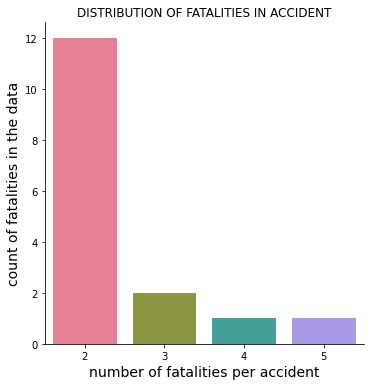

In [44]:
plt.figure(figsize = (10,6))
sns.catplot(x ='FATALITIES',kind = 'count',data = sorted_df.query("FATALITIES != [0,1]"),palette = "husl")
plt.title('DISTRIBUTION OF FATALITIES IN ACCIDENT')
plt.xlabel('number of fatalities per accident',size = 14)
plt.ylabel('count of fatalities in the data',size = 14)
plt.show()

## NUMBER OF PERSONS IN ACCIDENT

count of "number of persons involved per accident"

In [46]:
sorted_df['PERSONCOUNT'].value_counts().to_frame()

,PERSONCOUNT
2,95176
3,34523
4,14335
1,10726
5,6565
0,5220
6,2713
7,1133
8,528
9,213


Text(0.5, 6.79999999999999, 'number of persons')

<Figure size 1080x576 with 0 Axes>

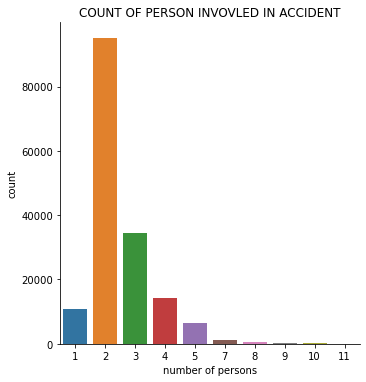

In [47]:
plt.figure(figsize=(15,8))
sns.catplot(x= 'PERSONCOUNT',kind = 'count',orient= "h",data = sorted_df.query("PERSONCOUNT == [1,2,3,4,5,7,8,9,10,11]"),palette = 'tab10');
plt.title('COUNT OF PERSON INVOVLED IN ACCIDENT')
plt.xlabel('number of persons')


## PEDESTRIANS COUNT IN ACCIDENT

count of "pedestrians involved per accident"

In [48]:
sorted_df['PEDCOUNT'].value_counts().to_frame()

,PEDCOUNT
0,163820
1,7379
2,266
3,27
4,9
5,2
6,1


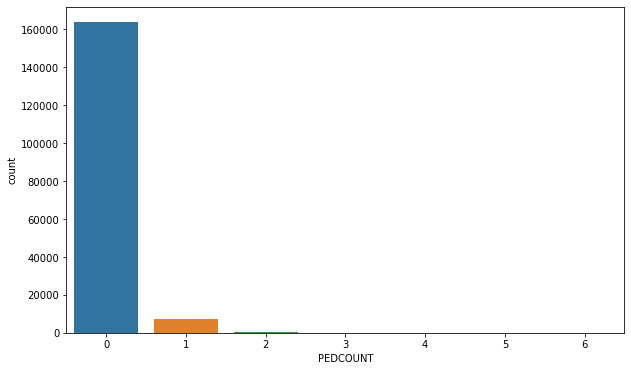

In [49]:
plt.figure(figsize = (10,6))
ax = sns.countplot(sorted_df['PEDCOUNT'])

## CYCLES IN ACCIDENT

In [50]:
sorted_df['PEDCYLCOUNT'].value_counts().to_frame()

,PEDCYLCOUNT
0,165741
1,5713
2,50


## VEHICLES IN ACCIDENT

count of 'number of vehicles  in a accident'

In [51]:
sorted_df['VEHCOUNT'].value_counts().to_frame()

,VEHCOUNT
2,129872
1,25542
3,12673
4,2418
5,537
0,228
6,147
7,48
8,18
9,10


Text(0.5, 0, 'number of vehicles')

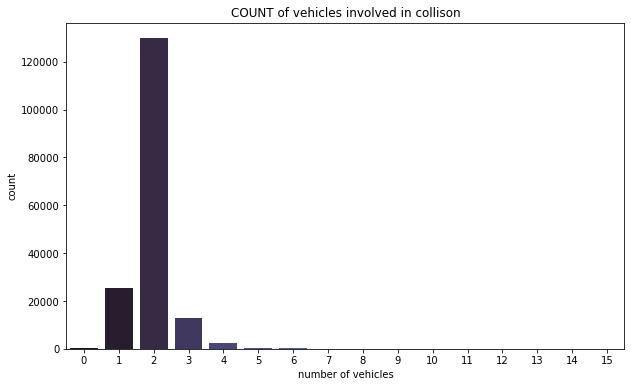

In [52]:
plt.figure(figsize =(10,6))
sns.countplot('VEHCOUNT',data = sorted_df,palette = 'mako')
plt.title('COUNT of vehicles involved in collison')
plt.xlabel('number of vehicles')

## UNDER INFLUENCE OF ALCOHOL OR DRUGS

In [53]:
sorted_df['UNDERINFL'].value_counts().to_frame()

,UNDERINFL
0.0,162275
1.0,9229


Text(0.5, 1.0, 'accidents caused due to alcohol or drugs')

<Figure size 720x432 with 0 Axes>

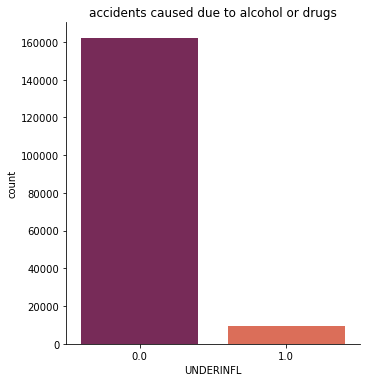

In [54]:
plt.figure(figsize =(10,6))
sns.catplot(x='UNDERINFL',kind="count",data = sorted_df,palette = 'rocket')
plt.title('accidents caused due to alcohol or drugs')


# data exploration and preparation

#### in this section we will try to explore and get more insights of the data set and finally prepare the data set for modelling

corr() function here gives the correlation co-efficient between different parameters in the data set
compare correlation between parameters particularly the severity column which we are interested now for model

In [55]:
sorted_df.corr()

,X,Y,SPEEDING,SEVERITYCODE,UNDERINFL,SERIOUSINJURIES,FATALITIES,INJURIES,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT
X,1.000000,-0.158676,-0.009677,0.002361,-0.033392,-0.006814,-0.000114,0.009302,0.011393,0.010839,-0.004793,-0.015737
Y,-0.158676,1.000000,-0.026666,0.023459,-0.005193,-0.000419,-0.003478,0.016154,-0.010943,0.014717,0.029661,0.018080
SPEEDING,-0.009677,-0.026666,1.000000,0.048562,0.094217,0.038448,0.041086,0.044369,-0.005316,-0.035890,-0.024745,-0.038900
SEVERITYCODE,0.002361,0.023459,0.048562,1.000000,0.055525,0.337324,0.206642,0.768382,0.103561,0.281785,0.215185,-0.111937
UNDERINFL,-0.033392,-0.005193,0.094217,0.055525,1.000000,0.041488,0.042153,0.042230,0.017513,0.023177,-0.020780,-0.009842
SERIOUSINJURIES,-0.006814,-0.000419,0.038448,0.337324,0.041488,1.000000,0.178368,0.282178,0.105172,0.127336,0.058016,-0.045442
FATALITIES,-0.000114,-0.003478,0.041086,0.206642,0.042153,0.178368,1.000000,0.068393,0.047339,0.075236,0.009220,-0.028297
INJURIES,0.009302,0.016154,0.044369,0.768382,0.042230,0.282178,0.068393,1.000000,0.266391,0.151599,0.109134,0.026816
PERSONCOUNT,0.011393,-0.010943,-0.005316,0.103561,0.017513,0.105172,0.047339,0.266391,1.000000,-0.027806,-0.047448,0.397875
PEDCOUNT,0.010839,0.014717,-0.035890,0.281785,0.023177,0.127336,0.075236,0.151599,-0.027806,1.000000,-0.023997,-0.327263


visually representing the correlation lighter the color higher is the correlation between parameters.

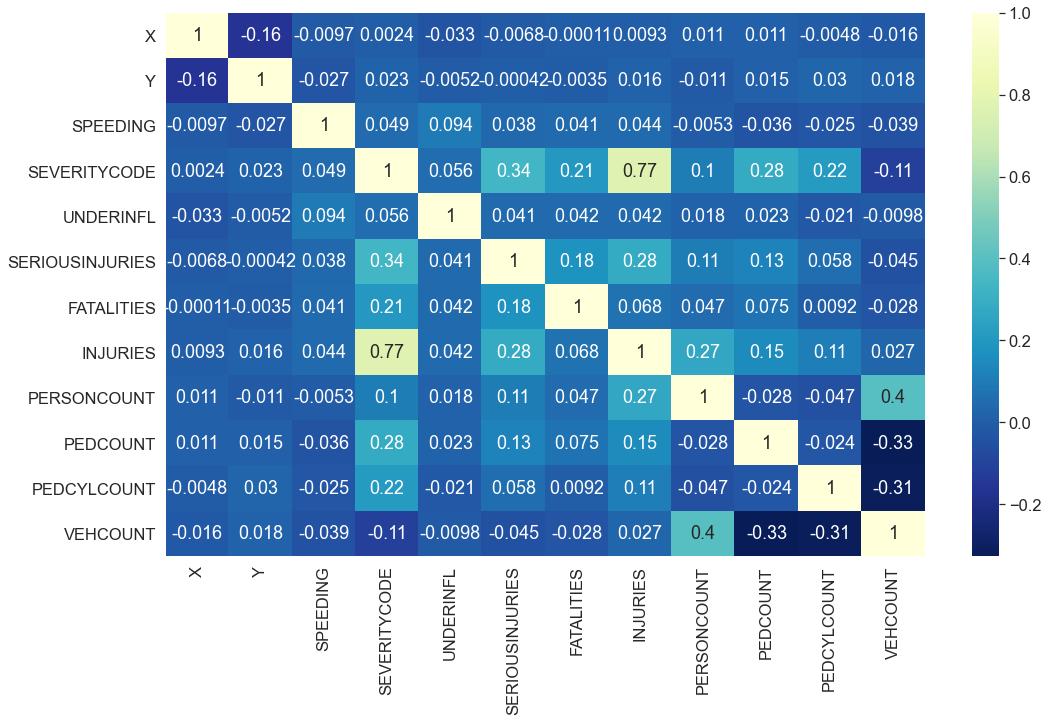

In [56]:
sns.set(font_scale = 1.5)
plt.figure(figsize = (17,10))
sns.heatmap(sorted_df.corr(),cmap='YlGnBu_r',annot = True)

comparison between the severity code and injuries

Text(0.5, 0, 'proportion of injuries')

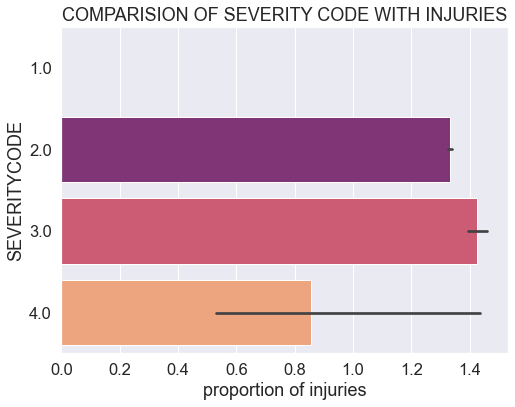

In [57]:
plt.figure(figsize = (8,6))
sns.barplot(y='SEVERITYCODE',x='INJURIES',palette = "magma",data=sorted_df,orient = 'h')
plt.title('COMPARISION OF SEVERITY CODE WITH INJURIES')
plt.xlabel('proportion of injuries')

#### comparision between number of deaths with severity code

Text(0.5, 0, 'proportion of deaths')

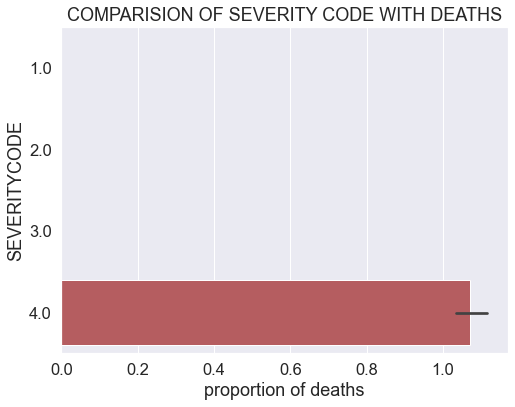

In [58]:
plt.figure(figsize = (8,6))
sns.barplot(y='SEVERITYCODE',x='FATALITIES',orient = 'h',data=sorted_df)
plt.title('COMPARISION OF SEVERITY CODE WITH DEATHS')
plt.xlabel('proportion of deaths')

from graph we can conclude that maximum contribution of deaths were captured in the severity code 4

below is map of settle city.
above map there are number showing intensity of accident (number of accidents took place in those visible region among 1000 randomly selected accidents)
zoom in and out to find out intensity of accident per each region
zoom in further to find exact location of an accident 

In [59]:
import folium
from folium.plugins import MarkerCluster

In [103]:
map = folium.Map(location=[47.60, -122.33], zoom_start=12)
marker_cluster = MarkerCluster().add_to(map)
locations = sorted_df[['Y', 'X']][sorted_df['Y'].notna()].sample(1000)
locationlist = locations.values.tolist()
for point in range(len(locations)):
    folium.Marker(locationlist[point]).add_to(marker_cluster)
map

In [60]:
 sorted_df = sorted_df.sample(frac=1).reset_index(drop=True)

one hot enconding here the columns having object(string or text) are converted to integer data types resulting in  few more columns in dataframe


In [61]:
road = pd.get_dummies(sorted_df['ROADCOND'])
weather = pd.get_dummies(sorted_df['WEATHER'])
light = pd.get_dummies(sorted_df['LIGHTCOND'])
final_df = sorted_df.drop(['ROADCOND','WEATHER','LIGHTCOND'],axis = 1)
final_df = pd.concat([final_df,road,weather,light],axis = 1)
print(final_df.info())
final_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171504 entries, 0 to 171503
Data columns (total 35 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   X                         171504 non-null  float64
 1   Y                         171504 non-null  float64
 2   SPEEDING                  171504 non-null  float64
 3   SEVERITYCODE              171504 non-null  float64
 4   UNDERINFL                 171504 non-null  float64
 5   SERIOUSINJURIES           171504 non-null  int64  
 6   FATALITIES                171504 non-null  int64  
 7   INJURIES                  171504 non-null  int64  
 8   PERSONCOUNT               171504 non-null  int64  
 9   PEDCOUNT                  171504 non-null  int64  
 10  PEDCYLCOUNT               171504 non-null  int64  
 11  VEHCOUNT                  171504 non-null  int64  
 12  Dry                       171504 non-null  uint8  
 13  Ice                       171504 non-null  u

,X,Y,SPEEDING,SEVERITYCODE,UNDERINFL,SERIOUSINJURIES,FATALITIES,INJURIES,PERSONCOUNT,PEDCOUNT,...,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk
0,-122.324496,47.617047,0.0,1.0,0.0,0,0,0,2,0,...,0,0,0,0,0,1,0,0,0,0
1,-122.354112,47.705080,0.0,2.0,0.0,0,0,2,2,0,...,0,0,0,0,0,0,0,0,1,0
2,-122.335827,47.624543,0.0,2.0,0.0,0,0,1,2,1,...,0,0,0,0,0,1,0,0,0,0
3,-122.315030,47.599601,0.0,1.0,0.0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,1,0
4,-122.350525,47.649707,0.0,1.0,0.0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,1,0


dropping the unneccesary features for modeling and separting target variable that is 'SEVERITYCODE' from data set

In [69]:
from sklearn import preprocessing
y = final_df[['SEVERITYCODE']]
x = final_df.drop(['X','Y','SEVERITYCODE'],axis = 1)
print(x.head(3))
print(y.head(3))

   SPEEDING  UNDERINFL  SERIOUSINJURIES  FATALITIES  INJURIES  PERSONCOUNT  \
0       0.0        0.0                0           0         0            2   
1       0.0        0.0                0           0         2            2   
2       0.0        0.0                0           0         1            2   

   PEDCOUNT  PEDCYLCOUNT  VEHCOUNT  Dry  ...  Severe Crosswind  \
0         0            0         2    1  ...                 0   
1         0            0         2    1  ...                 0   
2         1            0         1    1  ...                 0   

   Sleet/Hail/Freezing Rain  Snowing  Dark - No Street Lights  \
0                         0        0                        0   
1                         0        0                        0   
2                         0        0                        0   

   Dark - Street Lights Off  Dark - Street Lights On  Dark - Unknown Lighting  \
0                         0                        1                        0   

sklearn has scaler function which noramlizes the data such that features have unit variance and zero mean.
further data is split randomly into train and test set which are used for training the model and testing the trained model respectively.


In [70]:
scaled_data = preprocessing.StandardScaler().fit_transform(x)
scaled_y = preprocessing.StandardScaler().fit_transform(y)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 1,test_size =0.2)

now data set is completly ready for training the model.
below code is used to train model .here decision tree classifier algorithm is used 

In [71]:
pip install - scikit-learn scipy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [72]:
from sklearn.tree import DecisionTreeClassifier
TreeModel = DecisionTreeClassifier(criterion='entropy', max_depth=5)
TreeModel.fit(x_train, y_train)
TreeModel

DecisionTreeClassifier(criterion='entropy', max_depth=5)

the data kept aside for testing is now used to predict from the model 
now this model result and true result are compared for estimating our model accuracy

In [73]:
yhat = TreeModel.predict(x_test)
yhat[0:4]

array([1., 2., 1., 2.])

model accuracy can be represented view classification report

In [74]:
from sklearn.metrics import classification_report, roc_auc_score
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     22586
         2.0       1.00      1.00      1.00     11059
         3.0       1.00      1.00      1.00       599
         4.0       1.00      1.00      1.00        57

    accuracy                           1.00     34301
   macro avg       1.00      1.00      1.00     34301
weighted avg       1.00      1.00      1.00     34301



we can see here our model prefectly predicted all the test data so we have the model with 100% accuracy !!

In [75]:
from sklearn.ensemble import RandomForestClassifier
rfcModel = RandomForestClassifier(n_estimators=75)
rfcModel.fit(x_train, y_train)

RandomForestClassifier(n_estimators=75)

In [76]:
yHat = rfcModel.predict(x_test)
print(classification_report(y_test,yHat))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     22586
         2.0       1.00      1.00      1.00     11059
         3.0       1.00      1.00      1.00       599
         4.0       1.00      1.00      1.00        57

    accuracy                           1.00     34301
   macro avg       1.00      1.00      1.00     34301
weighted avg       1.00      1.00      1.00     34301

